# pyobis Example Usage
pyobis parent repo: [github.com/iobis/pyobis](https://github.com/iobis/pyobis). This Notebook contains examples of modules inside pyobis package. pyobis is the Python client for the OBIS API.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iobis/pyobis/blob/master/notebooks/usage_guide.ipynb)

## Installing pyobis

In [1]:
try:
  import pyobis
except:
  !pip install git+https://github.com/iobis/pyobis.git

# pyobis Example Usage

## Occurrence
*Using occurrences.search: to find occurrences based on scientificname, or for all taxa if left blank.*

Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| scientificname  | String    | Scientific name. Leave empty to include all taxa. |
| taxonid         | String    | Taxon AphiaID                   |
| datasetid       | String| Dataset UUID|
|startdate|String|Start date formatted as YYYY-MM-DD|
|enddate|String|End date formatted as YYYY-MM-DD|
|startdepth|Integer|Start depth, in meters|
|enddepth| Integer|End depth, in meters|
|geometry|String|Geometry, formatted as WKT or GeoHash|
|flags| String|Comma separated list of quality flags that need to be set|
|mof|Boolean|True/False, Include MeasurementOrfact records|
|fields|String| Fields to be included in the result set|
|extensions|String|Extensions to include (e.g. MeasurementOrFact, DNADerivedData)|
|hasextensions|String|Extensions that need to be present (e.g. MeasurementOrFact, DNADerivedData)|

Example Usage

In [2]:
import pandas as pd
from pyobis import occurrences
res=occurrences.search(scientificname='Mola mola')
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'infraphylum': 'Gnathostomata', 'date_year': 2012, 'scientificNameID': 'urn:lsid:marinespecies.org:taxname:127405', 'scientificName': 'Mola mola', 'individualCount': '1', 'associatedReferences': '[{"crossref":{"citeinfo":{"origin":"Gatzke J, Khan C, Henry A, Cole T, Duley P","pubdate":"2013","title_html":"North Atlantic Right Whale Sighting Survey (NARWSS) and Right Whale Sighting Advisory System (RWSAS) 2012 Results Summary","title":"North Atlantic Right Whale Sighting Survey (NARWSS) and Right Whale Sighting Advisory System (RWSAS) 2012 Results Summary","serinfo":{"sername":"US Dept Commer, Northeast Fish Sci Cent Ref Doc","issue":"13-08; 7 p"},"onlink":"http:\\/\\/nefsc.noaa.gov\\/publications\\/crd\\/crd1308\\/"}}},{"crossref":{"citeinfo":{"origin":"Khan C, Cole T, Duley P, Henry A, Gatzke J, Corkeron","pubdate":"2012","title_html":"North Atlantic Right Whale Sighting Survey (NARWSS) and Right Whale Sighting Advisory System (RWSAS) 2011 Results Summary","title":"North Atlantic Ri

*Using occurrences.get(): to get record with id*

id parameter is Occurrence UUID, which is returned as "id" from occurrences.search()

In [3]:
from pyobis import occurrences
res=occurrences.get(id='00009261-7e82-4558-afd3-31b9fa3a7900')
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'type': 'Event', 'class': 'Actinopteri', 'genus': 'Mola', 'order': 'Tetraodontiformes', 'family': 'Molidae', 'phylum': 'Chordata', 'kingdom': 'Animalia', 'license': 'http://creativecommons.org/licenses/by-nc/4.0/', 'modified': '2022-02-03 15:29:13', 'datasetID': '513', 'eventDate': '2012-06-21T16:14:47', 'eventTime': '20:14:47Z', 'taxonRank': 'Species', 'waterBody': 'North Atlantic Ocean', 'datasetName': 'NEFSC Right Whale Aerial Survey', 'footprintWKT': 'POINT(-67.23578 42.34468)', 'occurrenceID': '513_57571', 'recordNumber': '513_57571', 'taxonRemarks': 'Taxon recorded as "OCSU" by the provider', 'basisOfRecord': 'HumanObservation', 'catalogNumber': '513_57571', 'geodeticDatum': 'EPSG:4326', 'collectionCode': '513', 'dateIdentified': '2012-06-21T16:14:47', 'scientificName': 'Mola mola', 'vernacularName': 'ocean sunfish', 'decimalLatitude': 42.34468, 'individualCount': '1', 'institutionCode': 'NEFSC', 'specificEpithet': 'mola', 'taxonomicStatus': 'valid', 'decimalLongitude': -67.235

API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Occurrence/).

----
*Using occurrences.grid(): to Fetch gridded occurrences as GeoJSON or KML.*

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| precision       | Integer   | Geohash precision        |
| scientificname  | String    | Scientific name. Leave empty to include all taxa. |
| taxonid         | String    | Taxon AphiaID                   |
| datasetid       | String| Dataset UUID|
|startdate|String|Start date formatted as YYYY-MM-DD|
|enddate|String|End date formatted as YYYY-MM-DD|
|startdepth|Integer|Start depth, in meters|
|enddepth| Integer|End depth, in meters|
|geometry|String|Geometry, formatted as WKT or GeoHash|
|flags| String|Comma separated list of quality flags that need to be set|
|redlist | Boolean| Red List species only, True/False.|
| hab | Boolean | HAB species only, true/false.|
| event|String| Include pure event records (include) or get pure event records exclusively (true).|
| exclude| String| Comma separated list of quality flags to be excluded.|

Example Usage

In [4]:
from pyobis import occurrences
res=occurrences.grid(precision=1, geojson=True, scientificname='Abra alba')
print(res)
print(pd.DataFrame(res))

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[0, 45], [45, 45], [45, 90], [0, 90], [0, 45]]]}, 'properties': {'n': 41878}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-45, 45], [0, 45], [0, 90], [-45, 90], [-45, 45]]]}, 'properties': {'n': 18277}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[0, 0], [45, 0], [45, 45], [0, 45], [0, 0]]]}, 'properties': {'n': 662}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-45, 0], [0, 0], [0, 45], [-45, 45], [-45, 0]]]}, 'properties': {'n': 81}}, {'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[-90, 0], [-45, 0], [-45, 45], [-90, 45], [-90, 0]]]}, 'properties': {'n': 1}}]}
                type                                           features
0  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Poly...
1  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Poly...
2 

API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Occurrence/).

----
*Using occurrences.getpoints(): to Fetch point occurrences as GeoJSON (aggregated to Geohash precision 8)*

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| scientificname  | String    | Scientific name. Leave empty to include all taxa. |
| taxonid         | String    | Taxon AphiaID                   |
| datasetid       | String| Dataset UUID|
| nodeid       | String| Node UUID|
|startdate|String|Start date formatted as YYYY-MM-DD|
|enddate|String|End date formatted as YYYY-MM-DD|
|startdepth|Integer|Start depth, in meters|
|enddepth| Integer|End depth, in meters|
|geometry|String|Geometry, formatted as WKT or GeoHash|
|redlist | Boolean| Red List species only, True/False.|
| hab | Boolean | HAB species only, true/false.|
| event|String| Include pure event records (include) or get pure event records exclusively (true).|
| flags|String| Comma separated list of quality flags which need to be set.|
| exclude| String| Comma separated list of quality flags to be excluded.|

In [5]:
from pyobis import occurrences
res=occurrences.getpoints(scientificname = ['Mola mola','Abra alba'])
print(res)
print(pd.DataFrame(res))

{'type': 'MultiPoint', 'coordinates': [[10.318737030029297, 56.15464210510254], [10.289554595947266, 56.092844009399414], [-3.8804054260253906, 48.8027286529541], [10.246295928955078, 56.114816665649414], [10.245609283447266, 56.136274337768555], [9.857654571533203, 55.64927101135254], [10.097980499267578, 55.67450523376465], [9.668827056884766, 55.704030990600586], [10.564556121826172, 55.542497634887695], [10.289554595947266, 56.134042739868164], [11.532039642333984, 55.14784812927246], [9.912586212158203, 55.50816535949707], [10.448169708251953, 54.597673416137695], [10.064334869384766, 55.580949783325195], [9.63449478149414, 55.700082778930664], [10.36886215209961, 56.24270439147949], [9.69217300415039, 55.38559913635254], [8.414669036865234, 56.60079002380371], [11.026325225830078, 56.44234657287598], [12.62002944946289, 55.97662925720215], [10.759220123291016, 55.07077217102051], [10.532283782958984, 55.60275077819824], [9.95859146118164, 55.60446739196777], [10.170764923095703, 

API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Occurrence/).

---- 
*Using occurrences.point(): to Fetch point occurrences for a location (with Geohash precision 8 or variable Geohash precision) as GeoJSON.*

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| x               | float     | latitudes of a location  |
| y | float| laongitude of a location|
|z| float| zoom level, if present then variable Geohash precision, if absent then precision 8|
| scientificname  | String    | Scientific name. Leave empty to include all taxa. |
| taxonid         | String    | Taxon AphiaID        |
| datasetid       | String| Dataset UUID|
| nodeid       | String| Node UUID|
|startdate|String|Start date formatted as YYYY-MM-DD|
|enddate|String|End date formatted as YYYY-MM-DD|
|startdepth|Integer|Start depth, in meters|
|enddepth| Integer|End depth, in meters|
|geometry|String|Geometry, formatted as WKT or GeoHash|
|redlist | Boolean| Red List species only, True/False.|
| hab | Boolean | HAB species only, true/false.|
|wrims| boolean| WRiMS species only, True/False.|
| event|String| Include pure event records (include) or get pure event records exclusively (true).|
| flags|String| Comma separated list of quality flags which need to be set.|
| exclude| String| Comma separated list of quality flags to be excluded.|

Example Usage

In [6]:
from pyobis import occurrences
res=occurrences.point(x=1.77,y=54.22,scientificname = 'Mola mola')
print(res)
print(pd.DataFrame(res))

{'total': 0, 'results': []}
Empty DataFrame
Columns: [total, results]
Index: []


API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Occurrence/).

---- 
*Using occurrences.tile(): to Fetch point occurrences for a tile (aggregated using variable Geohash precision based on zoom level) as GeoJSON or MVT.*

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| x               | float     | latitudes of a location  |
| y | float| laongitude of a location|
|z| float| zoom level|
| scientificname  | String    | Scientific name. Leave empty to include all taxa. |
| taxonid         | String    | Taxon AphiaID        |
| datasetid       | String| Dataset UUID|
| nodeid       | String| Node UUID|
|startdate|String|Start date formatted as YYYY-MM-DD|
|enddate|String|End date formatted as YYYY-MM-DD|
|startdepth|Integer|Start depth, in meters|
|enddepth| Integer|End depth, in meters|
|geometry|String|Geometry, formatted as WKT or GeoHash|
|redlist | Boolean| Red List species only, True/False.|
| hab | Boolean | HAB species only, true/false.|
|wrims| boolean| WRiMS species only, True/False.|
| event|String| Include pure event records (include) or get pure event records exclusively (true).|
| flags|String| Comma separated list of quality flags which need to be set.|
| exclude| String| Comma separated list of quality flags to be excluded.|

Example Usage

In [7]:
from pyobis import occurrences
res=occurrences.tile(x=1.77,y=52.26,z=0.5,mvt=0, scientificname = 'Mola mola')
print(res)
print(pd.DataFrame(res))

{'type': 'MultiPoint', 'coordinates': [[4.921875, 42.890625], [-68.203125, 42.890625], [-72.421875, 40.078125], [-71.015625, 40.078125], [-69.609375, 42.890625], [3.515625, 42.890625], [-69.609375, 40.078125], [-66.796875, 42.890625], [-69.609375, 41.484375], [6.328125, 42.890625], [7.734375, 42.890625], [-72.421875, 38.671875], [-75.234375, 35.859375], [-68.203125, 40.078125], [-68.203125, 44.296875], [-68.203125, 41.484375], [-3.515625, 47.109375], [-2.109375, 44.296875], [-4.921875, 49.921875], [-66.796875, 41.484375], [-4.921875, 47.109375], [4.921875, 41.484375], [9.140625, 42.890625], [-4.921875, 48.515625], [-73.828125, 38.671875], [-75.234375, 37.265625], [-65.390625, 42.890625], [-71.015625, 41.484375], [-3.515625, 45.703125], [-66.796875, 44.296875], [-2.109375, 45.703125], [-66.796875, 40.078125], [6.328125, 41.484375], [-73.828125, 40.078125], [-4.921875, 51.328125], [7.734375, 41.484375], [-73.828125, 37.265625], [-76.640625, 34.453125], [-63.984375, 44.296875], [-6.328125

API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Occurrence/).

---- 
*Using occurrences.centroid(): to Determine the centroid for a selection of occurrence records.*

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| scientificname  | String    | Scientific name. Leave empty to include all taxa. |
| taxonid         | String    | Taxon AphiaID        |
| datasetid       | String| Dataset UUID|
| nodeid       | String| Node UUID|
|startdate|String|Start date formatted as YYYY-MM-DD|
|enddate|String|End date formatted as YYYY-MM-DD|
|startdepth|Integer|Start depth, in meters|
|enddepth| Integer|End depth, in meters|
|geometry|String|Geometry, formatted as WKT or GeoHash|
|redlist | Boolean| Red List species only, True/False.|
| hab | Boolean | HAB species only, true/false.|
|wrims| boolean| WRiMS species only, True/False.|
| event|String| Include pure event records (include) or get pure event records exclusively (true).|
| flags|String| Comma separated list of quality flags which need to be set.|
| exclude| String| Comma separated list of quality flags to be excluded.|

Example Usage

In [8]:
from pyobis import occurrences
res=occurrences.centroid(scientificname = 'Mola mola')
print(res)

{'lat': 39.9195402504701, 'lon': -37.24092126039807}


API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Occurrence/).

## Taxa
----
*Using taxa.search()*: Get taxon records.
Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| scientificname  | String    | Scientific name. Leave empty to include all taxa. |

Example Usage

In [9]:
from pyobis import taxa
res=taxa.search(scientificname='Abra')
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'scientificName': 'Abra', 'scientificNameAuthorship': 'Lamarck, 1818', 'taxonID': 138474, 'ncbi_id': 121180, 'taxonRank': 'Genus', 'taxonomicStatus': 'accepted', 'acceptedNameUsage': 'Abra', 'acceptedNameUsageID': 138474, 'is_marine': True, 'kingdom': 'Animalia', 'phylum': 'Mollusca', 'class': 'Bivalvia', 'subclass': 'Autobranchia', 'infraclass': 'Heteroconchia', 'subterclass': 'Euheterodonta', 'superorder': 'Imparidentia', 'order': 'Cardiida', 'superfamily': 'Tellinoidea', 'family': 'Semelidae', 'genus': 'Abra', 'kingdomid': 2, 'phylumid': 51, 'classid': 105, 'subclassid': 1424948, 'infraclassid': 1424949, 'subterclassid': 382296, 'superorderid': 869600, 'orderid': 869602, 'superfamilyid': 14636, 'familyid': 1781, 'genusid': 138474}]
  scientificName scientificNameAuthorship  taxonID  ncbi_id taxonRank  \
0           Abra            Lamarck, 1818   138474   121180     Genus   

  taxonomicStatus acceptedNameUsage  acceptedNameUsageID  is_marine   kingdom  \
0        accepted        

----
*Using taxa.taxon()*: Get taxon records.

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| id              | integer   | Taxon AphiaID (it is returned as "taxonID" in search results)|

Example Usage

In [10]:
from pyobis import taxa
res=taxa.taxon(id=138474)
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'scientificName': 'Abra', 'scientificNameAuthorship': 'Lamarck, 1818', 'taxonID': 138474, 'ncbi_id': 121180, 'taxonRank': 'Genus', 'taxonomicStatus': 'accepted', 'acceptedNameUsage': 'Abra', 'acceptedNameUsageID': 138474, 'is_marine': True, 'kingdom': 'Animalia', 'phylum': 'Mollusca', 'class': 'Bivalvia', 'subclass': 'Autobranchia', 'infraclass': 'Heteroconchia', 'subterclass': 'Euheterodonta', 'superorder': 'Imparidentia', 'order': 'Cardiida', 'superfamily': 'Tellinoidea', 'family': 'Semelidae', 'genus': 'Abra', 'kingdomid': 2, 'phylumid': 51, 'classid': 105, 'subclassid': 1424948, 'infraclassid': 1424949, 'subterclassid': 382296, 'superorderid': 869600, 'orderid': 869602, 'superfamilyid': 14636, 'familyid': 1781, 'genusid': 138474}]
  scientificName scientificNameAuthorship  taxonID  ncbi_id taxonRank  \
0           Abra            Lamarck, 1818   138474   121180     Genus   

  taxonomicStatus acceptedNameUsage  acceptedNameUsageID  is_marine   kingdom  \
0        accepted        

----
*Using taxa.annotations()* Get scientific name annotations by the WoRMS team.

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| scientificname  | String    | Scientific name. Leave empty to include all taxa.|

*Example Usage*

In [11]:
from pyobis import taxa
res=taxa.annotations(scientificname="Egg")
print(res["results"])
print(pd.DataFrame(res["results"])) 

[{'scientificname': 'Egg', 'annotation_type': 'Black: no biota', 'annotation_comment': None, 'annotation_resolved_aphiaid': None, 'scientificnameid': 'CYCLOPS', 'phylum': None, 'class': None, 'order': None, 'family': None, 'genus': None}]
  scientificname  annotation_type annotation_comment  \
0            Egg  Black: no biota               None   

  annotation_resolved_aphiaid scientificnameid phylum class order family genus  
0                        None          CYCLOPS   None  None  None   None  None  


API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Taxon/).

## Checklist
*Using checklist.list()*: to Generate an OBIS checklist

Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| scientificname  | String, Array| One or more scientific names from the OBIS backbone. All included and synonym taxa are included in the search. Leave empty to include all taxa. |
|taxonid| Fixnum| A obis occurrence identifier|
| geometry| String| Well Known Text (WKT). A WKT shape written as either POINT, LINESTRING, LINEARRING or POLYGON. Example of a polygon: ((30.1 10.1, 20, 20 40, 40 40, 30.1 10.1)) would be queried as http://bit.ly/1BzNwDq|
| nodeid| Fixnum| Node UUID.|
| startdate| String| Start date YYYY-MM-DD|
| enddate| String | End date YYYY-MM-DD|
| startdepth| Fixnum| Start depth|
| enddepth| Boolean| End depth|
| flags| String| Comma separated list of quality flags which need to be set|

Example Usage

In [12]:
from pyobis import checklist as ch
res = ch.list(scientificname = 'Mola mola')
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'scientificName': 'Mola mola', 'scientificNameAuthorship': '(Linnaeus, 1758)', 'taxonID': 127405, 'bold_id': 29489, 'ncbi_id': 94237, 'taxonRank': 'Species', 'taxonomicStatus': 'accepted', 'acceptedNameUsage': 'Mola mola', 'acceptedNameUsageID': 127405, 'is_marine': True, 'is_brackish': False, 'is_freshwater': False, 'is_terrestrial': False, 'kingdom': 'Animalia', 'phylum': 'Chordata', 'subphylum': 'Vertebrata', 'infraphylum': 'Gnathostomata', 'class': 'Actinopteri', 'subclass': 'Teleostei', 'order': 'Tetraodontiformes', 'family': 'Molidae', 'genus': 'Mola', 'species': 'Mola mola', 'kingdomid': 2, 'phylumid': 1821, 'subphylumid': 146419, 'infraphylumid': 1828, 'classid': 843664, 'subclassid': 293496, 'orderid': 10332, 'familyid': 125609, 'genusid': 126233, 'speciesid': 127405, 'category': 'VU', 'records': 20972}]
  scientificName scientificNameAuthorship  taxonID  bold_id  ncbi_id  \
0      Mola mola         (Linnaeus, 1758)   127405    29489    94237   

  taxonRank taxonomicStatus 

*Using checklist.redlist()*: to Generate a checklist of IUCN Red List species.

Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| scientificname  | String, Array| One or more scientific names from the OBIS backbone. All included and synonym taxa are included in the search. Leave empty to include all taxa. |
|taxonid| Fixnum| A obis occurrence identifier|
| nodeid| Fixnum| Node UUID.|
| geometry| String| Well Known Text (WKT). A WKT shape written as either POINT, LINESTRING, LINEARRING or POLYGON. Example of a polygon: ((30.1 10.1, 20, 20 40, 40 40, 30.1 10.1)) would be queried as http://bit.ly/1BzNwDq|
| startdate| String| Start date YYYY-MM-DD|
| enddate| String | End date YYYY-MM-DD|
| startdepth| Fixnum| Start depth|
| enddepth| Boolean| End depth|
| flags| String| Comma separated list of quality flags which need to be set|

Example Usage

In [13]:
import pandas as pd
from pyobis import checklist as ch
res=ch.redlist(scientificname='Mola')
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'scientificName': 'Mola mola', 'scientificNameAuthorship': '(Linnaeus, 1758)', 'taxonID': 127405, 'bold_id': 29489, 'ncbi_id': 94237, 'taxonRank': 'Species', 'taxonomicStatus': 'accepted', 'acceptedNameUsage': 'Mola mola', 'acceptedNameUsageID': 127405, 'is_marine': True, 'is_brackish': False, 'is_freshwater': False, 'is_terrestrial': False, 'kingdom': 'Animalia', 'phylum': 'Chordata', 'subphylum': 'Vertebrata', 'infraphylum': 'Gnathostomata', 'class': 'Actinopteri', 'subclass': 'Teleostei', 'order': 'Tetraodontiformes', 'family': 'Molidae', 'genus': 'Mola', 'species': 'Mola mola', 'kingdomid': 2, 'phylumid': 1821, 'subphylumid': 146419, 'infraphylumid': 1828, 'classid': 843664, 'subclassid': 293496, 'orderid': 10332, 'familyid': 125609, 'genusid': 126233, 'speciesid': 127405, 'category': 'VU', 'records': 20972}]
  scientificName scientificNameAuthorship  taxonID  bold_id  ncbi_id  \
0      Mola mola         (Linnaeus, 1758)   127405    29489    94237   

  taxonRank taxonomicStatus 

----
*Using checklist.newest()*: to Generate a checklist of most recently added species.

Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
| scientificname  | String, Array| One or more scientific names from the OBIS backbone. All included and synonym taxa are included in the search. Leave empty to include all taxa. |
|taxonid| Fixnum| A obis occurrence identifier|
| nodeid| Fixnum| Node UUID.|
| geometry| String| Well Known Text (WKT). A WKT shape written as either POINT, LINESTRING, LINEARRING or POLYGON. Example of a polygon: ((30.1 10.1, 20, 20 40, 40 40, 30.1 10.1)) would be queried as http://bit.ly/1BzNwDq|
| startdate| String| Start date YYYY-MM-DD|
| enddate| String | End date YYYY-MM-DD|
| startdepth| Fixnum| Start depth|
| enddepth| Boolean| End depth|
| flags| String| Comma separated list of quality flags which need to be set|

Example Usage

In [14]:
import pandas as pd
from pyobis import checklist as ch
res=ch.newest(scientificname='Abra Alba')
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'scientificName': 'Abra alba', 'scientificNameAuthorship': '(W. Wood, 1802)', 'taxonID': 141433, 'bold_id': 642814, 'ncbi_id': 399303, 'taxonRank': 'Species', 'taxonomicStatus': 'accepted', 'acceptedNameUsage': 'Abra alba', 'acceptedNameUsageID': 141433, 'is_marine': True, 'kingdom': 'Animalia', 'phylum': 'Mollusca', 'class': 'Bivalvia', 'subclass': 'Autobranchia', 'infraclass': 'Heteroconchia', 'subterclass': 'Euheterodonta', 'superorder': 'Imparidentia', 'order': 'Cardiida', 'superfamily': 'Tellinoidea', 'family': 'Semelidae', 'genus': 'Abra', 'species': 'Abra alba', 'kingdomid': 2, 'phylumid': 51, 'classid': 105, 'subclassid': 1424948, 'infraclassid': 1424949, 'subterclassid': 382296, 'superorderid': 869600, 'orderid': 869602, 'superfamilyid': 14636, 'familyid': 1781, 'genusid': 138474, 'speciesid': 141433, 'records': 60203, 'start_year': 1778}]
  scientificName scientificNameAuthorship  taxonID  bold_id  ncbi_id  \
0      Abra alba          (W. Wood, 1802)   141433   642814   399

API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Checklist/).

## Dataset
*Using dataset.search()*: to Find dataset records.

Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
|taxonid|Fixnum| A obis Taxon AphiaID.|
| scientificname|String, Array| One or more scientific names from the OBIS backbone. All included and synonym taxa are included in the search.|
| year|Fixnum| The 4 digit year. A year of 98 will be interpreted as AD 98. Supports range queries, smaller,larger (e.g., '1990,1991', whereas '1991,1990' wouldn't work)|
| geometry|String| Well Known Text (WKT). A WKT shape written as either POINT, LINESTRING, LINEARRING or POLYGON. Example of a polygon: ((30.1 10.1, 20, 20 40, 40 40, 30.1 10.1)) would be queried as http://bit.ly/1BzNwDq. Geometry, formatted as WKT or GeoHash.|
| nodeid|Fixnum| Node UUID.|
| startdate|Fixnum| Start date|
| enddate|Boolean| End date|
| startdepth|Fixnum| Start depth|
| enddepth|Boolean| End depth|
| flags|String, Array| Comma separated list of quality flags which need to be set|
| offset|Fixnum|Start at record. Default: 0|

Example Usage

In [15]:
import pandas as pd
from pyobis import dataset
res=dataset.search(scientificname = 'Mola mola')
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'id': '2101d4c5-c20b-49c0-a44b-3d6484c4c891', 'url': 'http://ipt.env.duke.edu/resource?r=zd_1404', 'archive': 'http://ipt.env.duke.edu/archive.do?r=zd_1404', 'published': '2022-01-20T16:06:56.000Z', 'created': None, 'updated': '2022-01-20T16:42:40.159Z', 'core': 'occurrence', 'extensions': [], 'statistics': {'Event': 0, 'absence': 0, 'dropped': 13, 'Occurrence': 133369, 'DNADerivedData': 0, 'MeasurementOrFact': 0}, 'extent': 'POLYGON((-179.978292 -25.86469,-179.978292 51.571235,179.986607 51.571235,179.986607 -25.86469,-179.978292 -25.86469))', 'title': 'Observatoire Pelagis aerial surveys 2002-2021', 'citation': 'Van Canneyt, O. 2022. Observatoire Pelagis aerial surveys 2002-2021. Data downloaded from OBIS-SEAMAP (http://seamap.env.duke.edu/dataset/1404) on yyyy-mm-dd.', 'citation_id': None, 'abstract': "Original provider:\nObservatoire PELAGIS UAR 3462 University La Rochelle - CNRS\n\nDataset credits:\nObservatoire PELAGIS UMS 3462, University La Rochelle - CNRS -Agence des Aires M

----
*Using dataset.get()*: to Get dataset by ID

Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
|id|Fixnum|An OBIS dataset identifier.|

Example Usage

In [16]:
import pandas as pd
from pyobis import dataset
res=dataset.get('ec9df3b9-3b2b-4d83-881b-27bcbcd57b95')
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'id': 'ec9df3b9-3b2b-4d83-881b-27bcbcd57b95', 'url': 'http://ipt.vliz.be/eurobis/resource?r=danishbenthicmonitoring', 'archive': 'http://ipt.vliz.be/eurobis/archive.do?r=danishbenthicmonitoring', 'published': '2022-05-18T13:18:07.000Z', 'created': None, 'updated': '2022-06-27T11:35:11.313Z', 'core': 'occurrence', 'extensions': ['measurementorfact'], 'statistics': {'Event': 0, 'absence': 0, 'dropped': 1641, 'Occurrence': 794717, 'DNADerivedData': 0, 'MeasurementOrFact': 1368903}, 'extent': 'POLYGON((7.7193 54.4994,7.7193 57.7979,14.3259 57.7979,14.3259 54.4994,7.7193 54.4994))', 'title': 'Danish benthic marine monitoring data from ODAM', 'citation': 'Josefson, A.; Rytter, D.; Department of Bioscience - AU, Denmark; (2015): Danish benthic marine monitoring data from ODAM.', 'citation_id': None, 'abstract': 'Data contain abundance (number of individuals per species) and biomass (wet weight or dry weight per species) information.', 'intellectualrights': 'This work is licensed under a  Cr

API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Dataset/).
## Nodes
*Using nodes.search()*: to Get OBIS nodes records.

Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
|id|String|Node UUID|

Example Usage

[{'id': '4bf79a01-65a9-4db6-b37b-18434f26ddfc', 'name': 'EurOBIS', 'description': 'EurOBIS - the European Node of the international Ocean Biodiversity Information System (OBIS) - publishes distribution data on marine species, collected within European marine waters or collected by European researchers outside European marine waters.', 'theme': 'European OBIS node', 'logo': '', 'url': ['http://www.eurobis.org'], 'type': 'regional', 'lon': 2.9294803, 'lat': 51.2332828, 'feeds': [{'id': 'e3dad797-a123-4e78-8473-5b0a295d3685', 'url': 'http://ipt.vliz.be/eurobis/rss.do'}, {'id': '2b52ff52-bd4f-4800-97b6-882bc7698a22', 'url': 'https://ipt.inbo.be/rss.do'}], 'contacts': [{'givenname': 'Leen', 'surname': 'Vandepitte', 'oceanexpert_id': 12313, 'email': 'leen.vandepitte@vliz.be'}, {'givenname': 'Joana', 'surname': 'Beja', 'oceanexpert_id': 28269, 'email': 'joana.beja@vliz.be'}, {'givenname': 'Ruben', 'surname': 'Perez Perez', 'oceanexpert_id': 37533, 'email': 'ruben.perez@vliz.be'}]}]
          
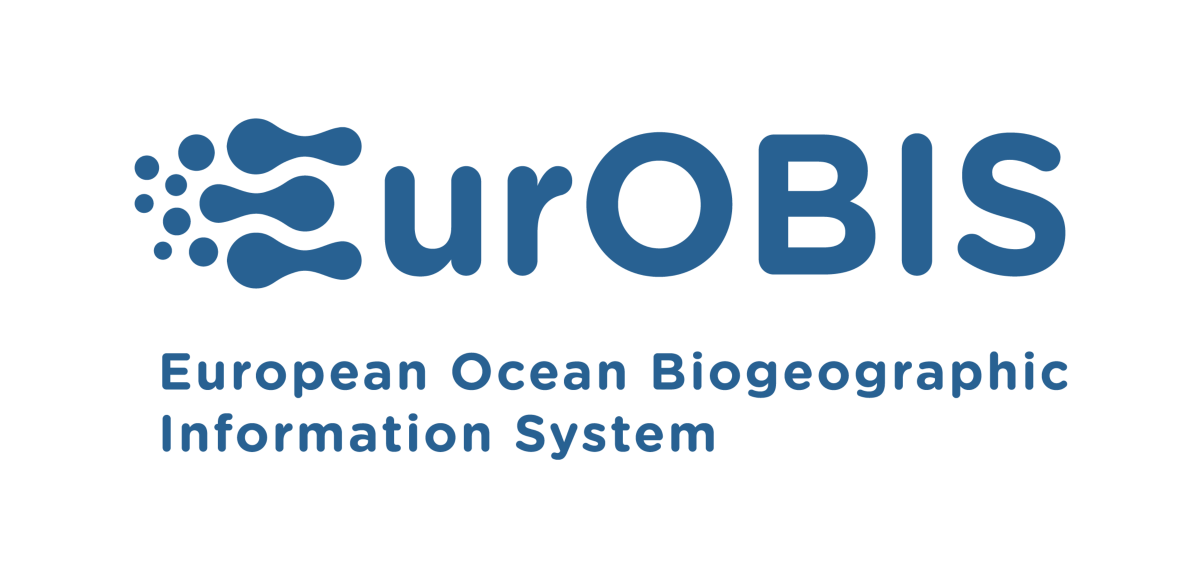

In [17]:
import pandas as pd
from pyobis import nodes
res=nodes.search(id="4bf79a01-65a9-4db6-b37b-18434f26ddfc")
print(res["results"])
print(pd.DataFrame(res["results"]))

----
*Using nodes.activities()*: to Get OBIS nodes activities

Input Parameter Details

| Input param     | Data Type | Description              |
| --------------- | --------- | ------------------------ |
|id|String|Node UUID|

Example Usage

In [18]:
import pandas as pd
from pyobis import nodes
res=nodes.activities(id="4bf79a01-65a9-4db6-b37b-18434f26ddfc")
print(res["results"])
print(pd.DataFrame(res["results"]))

[{'id': '4b35a5b4-2357-44b1-8de5-a134fc5c3a16', 'title': 'European Marine Observation and Data Network (EMODnet) - Biology', 'type': 'Other', 'type_other': 'Projects', 'description': 'The European Marine Data and Observation Network (EMODnet) aims to develop a system to make marine data available in support of scientists, policy makers and other end-users, within the framework of the new European maritime policy. VLIZ coordinates the biology lot, with 24 European partners and develops an online data portal. EMODNet Biology contributes to EurOBIS. EMODnet is currently in its third phase.\n', 'url': 'http://www.emodnet-biology.eu/', 'startdate': '2017-04-17T00:00:00.000Z', 'enddate': '2019-04-16T00:00:00.000Z', 'logo': None, 'contributions': [{'node_id': '4bf79a01-65a9-4db6-b37b-18434f26ddfc', 'node': 'EurOBIS', 'other_contributor': None, 'funding': [], 'funding_source': []}, {'node_id': '310922b4-9d0c-4de1-92d7-9b442d34765b', 'node': 'OBIS Secretariat', 'other_contributor': None, 'fundi

API Response details can be found here [OBIS v3 API](https://api.obis.org/#/Nodes/).